In [9]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Note:** I will drop some columns for simplicity of calculations. The goal is just to learn how linear regression works!

In [5]:
df.drop(['children', 'smoker', 'region'], axis=1, inplace=True)

In [6]:
#categorical_columns = ['sex','children', 'smoker', 'region']
categorical_columns = ['sex']
data_encoded = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [7]:
data_encoded['charges'] = np.log(data_encoded['charges'])

In [8]:
data_encoded.head()

,age,bmi,charges,OHE_male
0,19,27.900,9.734176,0
1,18,33.770,7.453302,1
2,28,33.000,8.400538,1
3,33,22.705,9.998092,1
4,32,28.880,8.260197,1


In [10]:
scaler = MinMaxScaler()
scaler.fit_transform(data_encoded)

array([[0.02173913, 0.3212268 , 0.67109571, 0.        ],
       [0.        , 0.47914985, 0.10656335, 1.        ],
       [0.2173913 , 0.45843422, 0.34101093, 1.        ],
       ...,
       [0.        , 0.56201238, 0.0924383 , 0.        ],
       [0.06521739, 0.26472962, 0.14407667, 0.        ],
       [0.93478261, 0.35270379, 0.80616954, 0.        ]])

In [11]:
X = data_encoded.drop('charges',axis=1) 
y = data_encoded['charges'] 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

# Linear Regression in Scikit-learn

In [ ]:
class LinearRegression:

    def __init__(self):

        self.theta = None

    def fit(self, X_train, X_test):
        
        X_train = np.c_[np.ones((X_train.shape[0],1)),X_train]
        self.X_test = np.c_[np.ones((X_test.shape[0],1)),X_test]
        
        self.theta = np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), np.matmul(X_train.T, y_train))

    def predict(self, X_test):
        y_pred =  np.matmul(self.X_test, self.theta)
        return y_pred

    def r2_score(self, y_pred, y_test):
        # R_square 
        sse = np.sum((y_pred - y_test)**2)
        sst = np.sum((y_test - y_test.mean())**2)
        R_square = 1 - (sse/sst)
        print('R square obtain for normal equation method is :',R_square)
    
    def mse(self, y_pred, y_test):
        return np.mean((y_test-y_pred)**2)


In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train, X_test)

In [ ]:
predictions = reg.predict(X_test)

In [ ]:
reg.r2_score(predictions, y_test)

R square obtain for normal equation method is : 0.8028014251476013


In [ ]:
reg.mse(predictions, y_test)

0.17256408243052676

# Linear Regression using Gradient Descent

In [ ]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [15]:
def compute_gradient(X, y, w, b):

    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for training_example in range(m):
        error = (np.dot(X[training_example], w) + b - y[training_example]) 
        for feature in range(n):
            dj_dw = dj_dw + error*X[training_example, feature]
        dj_db = dj_db + error
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db

In [25]:
initial_w = np.zeros_like(w_init)
initial_b = 0.

In [16]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    error = 0
    for training_example in range(m):
        error = error + (np.dot(X[training_example], w) + b - y[training_example])**2
    error = error / (2*m)
    return error

In [27]:
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -9.109365198729003
dj_dw at initial w,b: 
 [-648.06375114 -648.06375114 -648.06375114]


In [21]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 2562.294027088053


In [54]:
import copy

In [47]:
def gradient_descent(X, y, w, b, cost_function, compute_gradient, alpha, num_iters):
    b = b
    w = copy.deepcopy(w)
    J_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X_train, y_train, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w, b))
        
        if i% (num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    return w, b, J_history

In [48]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 2000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w,
                                            initial_b,compute_cost,
                                            compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

# Prediction
# m,_ = X_train.shape
# for i in range(m):
#     print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost    41.70   
Iteration  200: Cost    15.69   
Iteration  400: Cost     6.51   
Iteration  600: Cost     3.27   
Iteration  800: Cost     2.12   
Iteration 1000: Cost     1.71   
Iteration 1200: Cost     1.57   
Iteration 1400: Cost     1.52   
Iteration 1600: Cost     1.50   
Iteration 1800: Cost     1.50   
b,w found by gradient descent: 0.00,[0.12401089 0.12401089 0.12401089] 


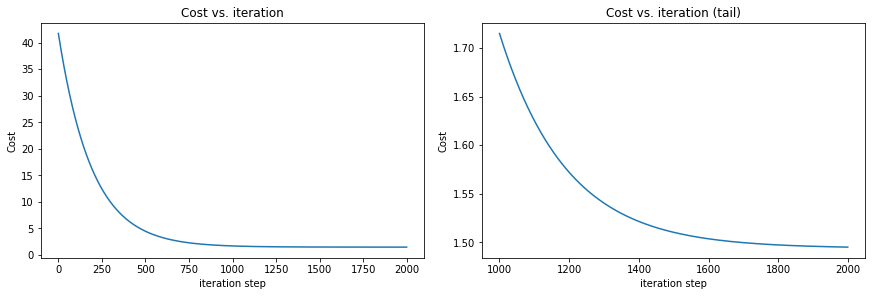

In [53]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(1000+np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()